
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.1 to 6.283185307179586
Generated 27000000 cartesian products in total
    Series1   Series2  Series3     Label
0 -3.641593 -3.141593      0.1  0.000015
1 -3.638248 -3.141593      0.1  0.000018
2 -3.634904 -3.141593      0.1  0.000021
3 -3.631559 -3.141593      0.1  0.000024
4 -3.628215 -3.141593      0.1  0.000029


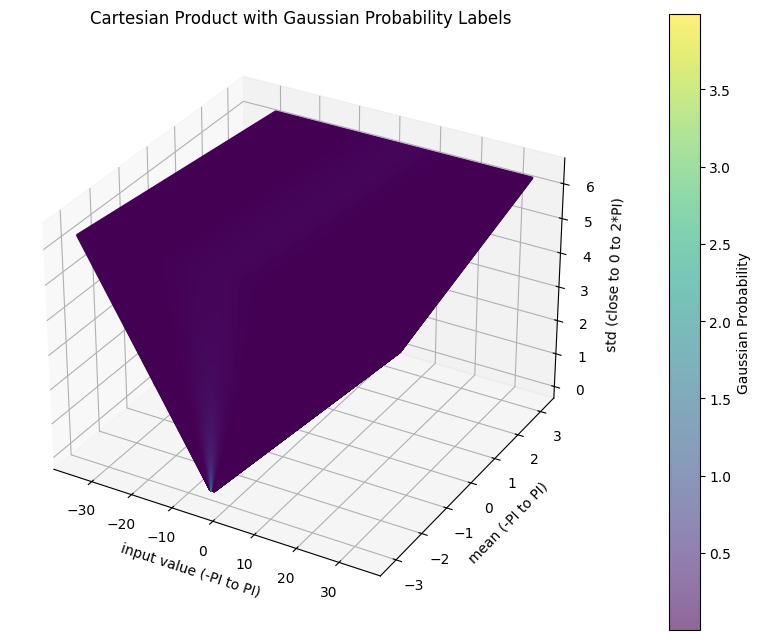

In [29]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100


# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.1
std = np.linspace(small_number, 2*np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Maybe there is a better way than normal random samples to insure some low values are present, but this is a simple way
    samples = np.random.normal(m, s, num_values)
    print(f"Generated {len(samples)} samples for mean {m} and std {s}, min: {samples.min()}, max: {samples.max()}")
    inputval.extend(samples)
    print(f"Generated {len(inputval)} input values for mean {m} and std {s}")
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    print(f"Generated {len(cartesian_product_input)} cartesian products for mean {m} and std {s}")
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [30]:
labels.head()

0    0.000015
1    0.000018
2    0.000021
3    0.000024
4    0.000029
Name: Label, dtype: float64

In [31]:
labels.describe()

count    2.700000e+07
mean     6.826209e-02
std      2.120040e-01
min      2.366188e-07
25%      1.333983e-04
50%      6.628137e-03
75%      6.178561e-02
max      3.988865e+00
Name: Label, dtype: float64

In [32]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(0.20547064494337455)

(array([1.83558e+07, 3.45120e+06, 1.80660e+06, 8.95200e+05, 5.37600e+05,
        3.59400e+05, 2.52600e+05, 1.89000e+05, 1.48800e+05, 1.19400e+05,
        9.48000e+04, 7.86000e+04, 6.60000e+04, 6.00000e+04, 4.86000e+04,
        4.26000e+04, 3.78000e+04, 3.66000e+04, 2.88000e+04, 2.46000e+04,
        2.46000e+04, 2.16000e+04, 2.10000e+04, 1.80000e+04, 1.68000e+04,
        1.62000e+04, 1.32000e+04, 1.20000e+04, 1.32000e+04, 9.60000e+03,
        1.20000e+04, 9.00000e+03, 1.02000e+04, 7.20000e+03, 1.08000e+04,
        4.80000e+03, 7.80000e+03, 8.40000e+03, 3.60000e+03, 6.60000e+03,
        7.80000e+03, 3.60000e+03, 4.80000e+03, 4.20000e+03, 6.00000e+03,
        3.60000e+03, 3.00000e+03, 4.80000e+03, 3.60000e+03, 4.80000e+03,
        3.00000e+03, 1.80000e+03, 2.40000e+03, 4.20000e+03, 4.80000e+03,
        2.40000e+03, 6.00000e+02, 2.40000e+03, 1.80000e+03, 3.00000e+03,
        2.40000e+03, 4.20000e+03, 1.20000e+03, 1.80000e+03, 6.00000e+02,
        1.80000e+03, 1.20000e+03, 1.80000e+03, 1.20

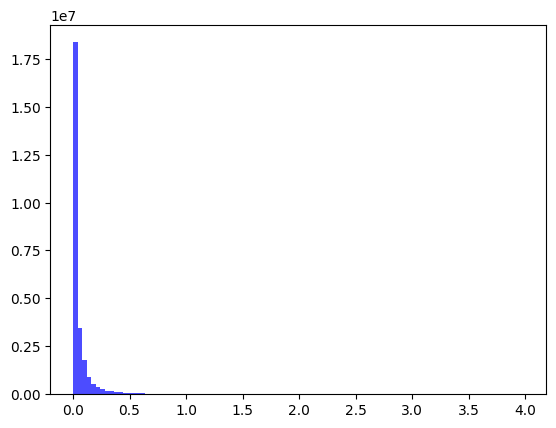

In [33]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [24]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.4069892993339459)

In [7]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data4_lin_input_5std.csv")
test_file = os.path.join(output_folder, "test_data4_lin_input_5std.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_data3.csv
Test dataset saved to ./test_data3.csv


In [9]:
train_df["Label"].describe()

count    800000.000000
mean          0.202578
std           0.397576
min           0.000003
25%           0.057804
50%           0.088397
75%           0.173182
max           3.989423
Name: Label, dtype: float64

In [10]:
test_df["Label"].describe()

count    2.000000e+05
mean     2.033215e-01
std      3.992272e-01
min      7.886607e-07
25%      5.808558e-02
50%      8.854799e-02
75%      1.733072e-01
max      3.989423e+00
Name: Label, dtype: float64

In [11]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 16545
Non-outlier observations: 783455
count    783455.000000
mean          0.155422
std           0.198781
min           0.000003
25%           0.057103
50%           0.086633
75%           0.163454
max           1.395295
dtype: float64


np.float64(0.08663327124620662)

In [12]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 22374
Non-outlier observations: 761081


In [13]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    761081.000000
mean          0.129816
std           0.129046
min           0.000003
25%           0.056132
50%           0.084364
75%           0.151828
max           0.751761
dtype: float64

(array([14583., 18527., 21066., 23876., 27039., 30685., 35354., 43252.,
        60324., 53524., 43790., 36042., 31021., 25983., 23140., 20069.,
        17557., 15911., 14043., 13005., 11444., 10123.,  9343.,  8955.,
         7662.,  7441.,  7138.,  6273.,  5830.,  5621.,  5155.,  5039.,
         4173.,  4171.,  4159.,  4213.,  3138.,  3674.,  3029.,  3308.,
         2770.,  2920.,  2569.,  2725.,  2231.,  2783.,  1839.,  2192.,
         2197.,  1647.,  2180.,  1850.,  1488.,  1658.,  1947.,  1233.,
         1425.,  1765.,  1458.,  1069.,  1166.,  1431.,  1655.,   858.,
          903.,  1047.,  1290.,  1441.,   720.,   799.,   884.,  1003.,
         1228.,  1117.,   659.,   645.,   729.,   773.,   832.,  1119.,
          863.,   518.,   499.,   579.,   570.,   588.,   764.,   898.,
         1092.,   398.,   401.,   456.,   426.,   428.,   504.,   528.,
          545.,   720.,  1096.,   283.]),
 array([2.83329790e-06, 7.52041188e-03, 1.50379905e-02, 2.25555690e-02,
        3.00731476e-02

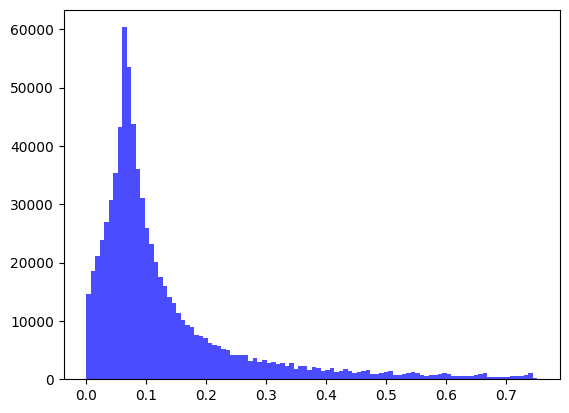

In [14]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')